# SVM Exercises

I did all the exercices, but for grading, skip to exercise 3.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly

## 1)
https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/   
![img1](img/img1.png)

In [2]:
from sklearn import svm, datasets
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_validate

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

X_y = pd.concat([pd.DataFrame(X, columns = ['x1','x2']), pd.DataFrame(y, columns = ['y'])], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [3]:
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

In [4]:
cross_acc = cross_validate(svc, X_test, y_test, scoring= 'accuracy', cv=3)
cross_recall = cross_validate(svc, X_test, y_test, scoring= 'accuracy', cv=3)
cross_precision = cross_validate(svc, X_test, y_test, scoring= 'accuracy', cv=3)

In [5]:
cross_precision

{'fit_time': array([0.00068045, 0.00062418, 0.00059962]),
 'score_time': array([0.00035381, 0.0003407 , 0.00034523]),
 'test_score': array([0.88235294, 0.82352941, 0.625     ])}

In [6]:
def plot_svm_borders(svc_object, X):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    plt.subplot(1, 1, 1)
    Z = svc_object.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title('SVC with linear kernel')
    plt.show()

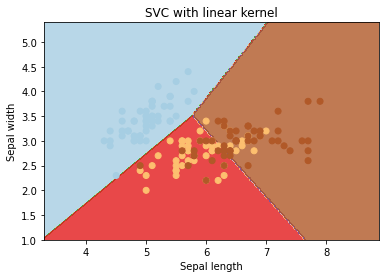

In [7]:
plot_svm_borders(svc, X)

## 2)
![img2](img/img2.png)

Reading the theory slides, which say:   
![img4](img/img4.png)   
This will translate that a smaller C will allow for more points to be missclassified. So, the expectation is that, on smaller C's the decision boundaries will be wildly inaccurate with the classification expected. While C grows, the decision boundaries will be heavily penalized if they have a missclassification.   
Which goes in accordance with this equation   
![img4](img/img5.png)   

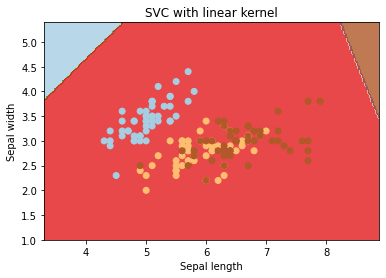

In [8]:
## C = 0.01
svc = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)
plot_svm_borders(svc, X)

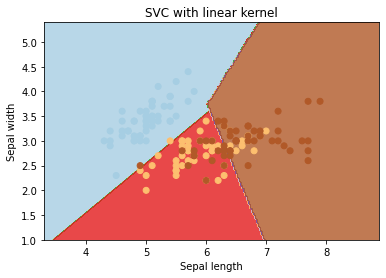

In [9]:
## C = 0.05
svc = svm.SVC(kernel='linear', C=0.05).fit(X_train, y_train)
plot_svm_borders(svc, X)

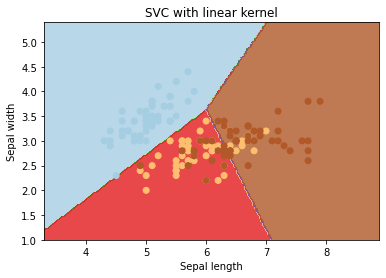

In [10]:
## C = 0.1
svc = svm.SVC(kernel='linear', C=0.1).fit(X_train, y_train)
plot_svm_borders(svc, X)

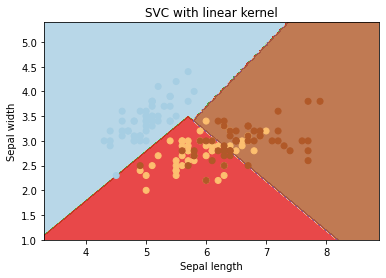

In [11]:
## C = 2
svc = svm.SVC(kernel='linear', C=2).fit(X_train, y_train)
plot_svm_borders(svc, X)

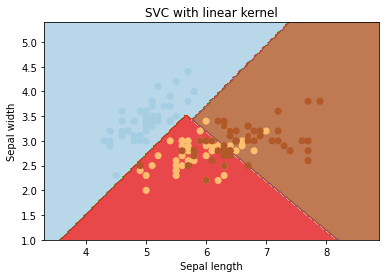

In [12]:
## C = 10
svc = svm.SVC(kernel='linear', C=10).fit(X_train, y_train)
plot_svm_borders(svc, X)

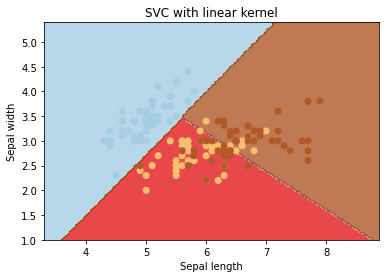

In [13]:
## C = 100
svc = svm.SVC(kernel='linear', C=100).fit(X_train, y_train)
plot_svm_borders(svc, X)

We see that with C very low, the decision boundaries are wildly inaccurate, as expetected, and they start improving as C goes up. Two notes to remember here, 1) we are working with a linear kernel and 2) we are working with only two features, so after a certain C, the difference is neglectable, but with more and more features, this huge increase in penalization means the model is more and more prone to overfitting in more dimensional data.

## 3)

![img3](img/img3.png)

   Degree     value    metric
0       1       0.8  Accuracy
1       2       0.8  Accuracy
2       3       0.8  Accuracy
3       4       0.8  Accuracy
4       5       0.8  Accuracy
..    ...       ...       ...
0       1  0.733333    Recall
1       2  0.733333    Recall
2       3  0.733333    Recall
3       4  0.733333    Recall
4       5  0.733333    Recall

[1800 rows x 3 columns]


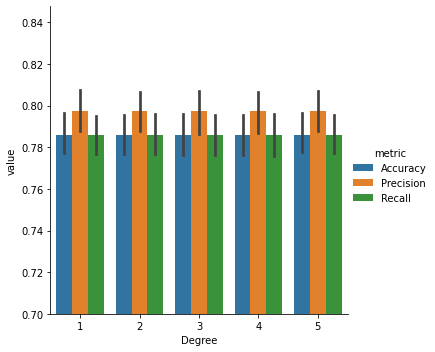

In [14]:
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score
# y_true, y_pred

history_poly_svm = pd.DataFrame(columns = ['Degree', 'value', 'metric'])
d = [1,2,3,4,5]

for deg in d:
    svc = svm.SVC(kernel='poly', C=1, degree = deg).fit(X_train, y_train)
    ## Sample data
    for batch in range(0,24):
        sample = X_y.sample(frac=0.3, replace=False)
        sample.to_numpy()
        x_sample = sample.to_numpy()[:,0:2]
        y_sample = sample.to_numpy()[:,2]
        sample_row_acc = pd.DataFrame({'Degree' : d, 
                        'value' : accuracy_score(y_sample, svc.predict(x_sample)), 
                        'metric' : 'Accuracy'}, index = None)
        sample_row_pre = pd.DataFrame({'Degree' : d, 
                        'value' : precision_score(y_sample, svc.predict(x_sample), average = 'weighted'), 
                        'metric' : 'Precision'}, index = None)
        sample_row_rec = pd.DataFrame({'Degree' : d, 
                        'value' : recall_score(y_sample, svc.predict(x_sample), average = 'weighted'), 
                        'metric' : 'Recall'}, index = None)
        history_poly_svm = pd.concat([history_poly_svm, sample_row_acc])
        history_poly_svm = pd.concat([history_poly_svm, sample_row_pre])
        history_poly_svm = pd.concat([history_poly_svm, sample_row_rec])
    
print(history_poly_svm)
g = sns.catplot(x="Degree", y="value", hue="metric", data=history_poly_svm, kind='bar')
g.set(ylim=(0.70, None))

    Gamma     value    metric
0    0.05  0.636364  Accuracy
1     1.0  0.636364  Accuracy
2     5.0  0.636364  Accuracy
3    10.0  0.636364  Accuracy
4   100.0  0.636364  Accuracy
..    ...       ...       ...
0    0.05  0.863636    Recall
1     1.0  0.863636    Recall
2     5.0  0.863636    Recall
3    10.0  0.863636    Recall
4   100.0  0.863636    Recall

[1875 rows x 3 columns]


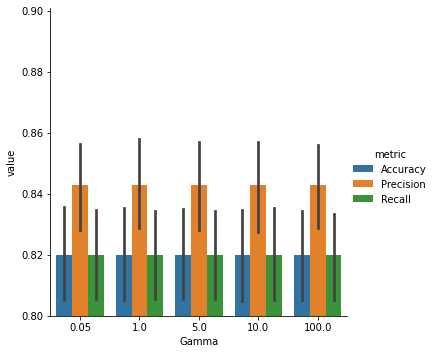

In [15]:
# Doesn't answer the question. A 3x3 plot grid with the different decision boundaries in 2d would be ideal.

history_poly_svm = pd.DataFrame(columns = ['Gamma', 'value', 'metric'])
gamma = [0.05,1,5,10,100]

for gam in gamma:
    svc = svm.SVC(kernel='rbf', C=1, gamma=gam).fit(X_train, y_train)
    ## Sample data
    for batch in range(0,25):
        sample = X_y.sample(frac=0.15, replace=True)
        sample.to_numpy()
        x_sample = sample.to_numpy()[:,0:2]
        y_sample = sample.to_numpy()[:,2]
        sample_row_acc = pd.DataFrame({'Gamma' : gamma, 
                        'value' : accuracy_score(y_sample, svc.predict(x_sample)), 
                        'metric' : 'Accuracy'}, index = None)
        sample_row_pre = pd.DataFrame({'Gamma' : gamma, 
                        'value' : precision_score(y_sample, svc.predict(x_sample), average = 'weighted'), 
                        'metric' : 'Precision'}, index = None)
        sample_row_rec = pd.DataFrame({'Gamma' : gamma, 
                        'value' : recall_score(y_sample, svc.predict(x_sample), average = 'weighted'), 
                        'metric' : 'Recall'}, index = None)
        history_poly_svm = pd.concat([history_poly_svm, sample_row_acc])
        history_poly_svm = pd.concat([history_poly_svm, sample_row_pre])
        history_poly_svm = pd.concat([history_poly_svm, sample_row_rec])
    
print(history_poly_svm)
g = sns.catplot(x="Gamma", y="value", hue="metric", data=history_poly_svm, kind='bar')
g.set(ylim=(0.800, None))

## 4)
 
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

![img6](img/img6.png)

In [16]:
# Let us make a baseline SVC

svc = svm.SVC(kernel='linear').fit(X_train, y_train)

My assumption is that 1) the support vectors will obviously change, and 2) because the decision boundary is entangled to the support vectors, so it will change too.  
I will test this assumption visually by adapting the code from this link: https://datafiction.github.io/docs/ml/Classifiers/SVM/svm/  
(Other attempts: https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html and  
https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html -- Three classes gives us a (3*(3-1) / 2) dimensional decision function)

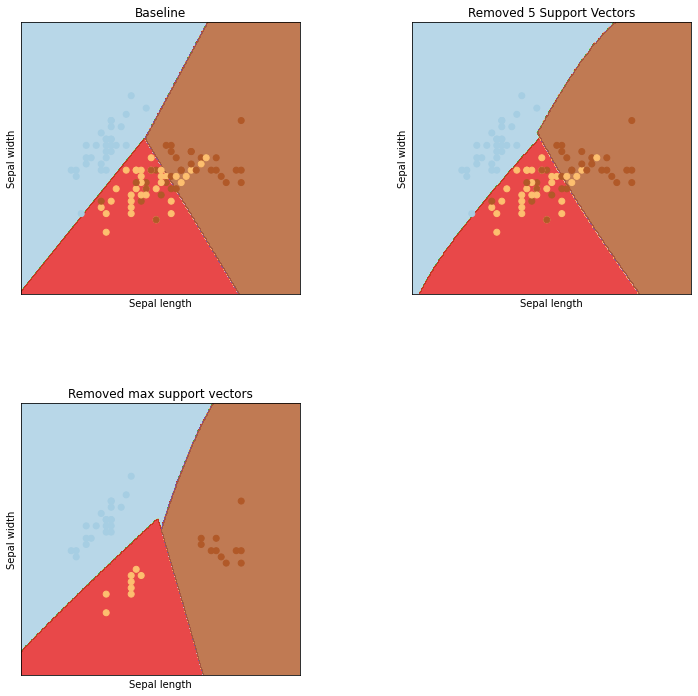

In [17]:
clf = svc

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.figure(figsize = [12,12])
# title for the plots
titles = ['Baseline',
          'Removed 5 Support Vectors',
         'Removed max support vectors']


for i, clf in enumerate([clf,'removed_vectors', 'max']):
    if clf == 'removed_vectors':
        clf = svc
        remove_indices = np.random.choice(svc.support_,5)
        X_train_removed_supports = np.delete(X_train, remove_indices, axis=0)
        y_train_removed_supports = np.delete(y_train, remove_indices, axis=0)
        X = X_train_removed_supports
        y = y_train_removed_supports
        clf = svm.SVC(kernel='rbf', C=1, gamma='scale').fit(X, y)
    elif clf == 'max':
        clf = svc
        remove_indices = svc.support_
        X_train_removed_supports = np.delete(X_train, remove_indices, axis=0)
        y_train_removed_supports = np.delete(y_train, remove_indices, axis=0)
        X = X_train_removed_supports
        y = y_train_removed_supports
        clf = svm.SVC(kernel='rbf', C=1, gamma='scale').fit(X, y)
    else:
        X = X_train
        y = y_train

                         
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

As we can see, the decision boundaries changed dramatically a bit with the removal of 5 support vectors, and witg the removal of all initial support vectors, we have a perfect classification, because those support vectors, theorically the hardest data points to classify, were removed.

## 5)

![img7](img/img7.png)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [18]:
## Baseline

svc = svm.SVC(kernel='rbf').fit(X_train, y_train)

In [19]:
## Baseline Results

baseline_acc = accuracy_score(y_test, svc.predict(X_test))
baseline_pre = precision_score(y_test, svc.predict(X_test), average = 'weighted')
baseline_rec = recall_score(y_test, svc.predict(X_test), average = 'weighted')

print(f'Accuracy: {baseline_acc}\nPrecision: {baseline_pre}\nRecall: {baseline_rec}')

Accuracy: 0.78
Precision: 0.7821052631578947
Recall: 0.78


In [20]:
## Grid Search
from sklearn.model_selection import GridSearchCV

parameters = [{'kernel':('linear', 'rbf'), 'C':[0.7,0.9,1, 2.5, 5, 10]},{'kernel':['poly'], 'C':[0.7,0.9,1, 2.5, 5, 10], 'degree':[1,2,3]}]
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5).fit(X_train, y_train)

In [21]:
clf.best_estimator_

SVC(C=0.9, kernel='linear')

In [22]:
## GridSearch Results

gs_5fcv_acc = accuracy_score(y_test, clf.best_estimator_.predict(X_test))
gs_5fcv_pre = precision_score(y_test, clf.best_estimator_.predict(X_test), average = 'weighted')
gs_5fcv_rec = recall_score(y_test, clf.best_estimator_.predict(X_test), average = 'weighted')

print(f'Accuracy: {gs_5fcv_acc}\nPrecision: {gs_5fcv_pre}\nRecall: {gs_5fcv_rec}')

Accuracy: 0.78
Precision: 0.7821052631578947
Recall: 0.78


## 6)



![img8](img/img8.png)   
![img9](img/img9.png)

In [23]:
xy_datapoint = pd.read_csv('data/points.csv')

In [25]:
xy_datapoint.head(5)

,x,y,color
0,-6.5,4.75,Red
1,-5.7,3.20,Red
2,-5.0,2.20,Red
3,-3.2,1.25,Red
4,-2.2,1.10,Red


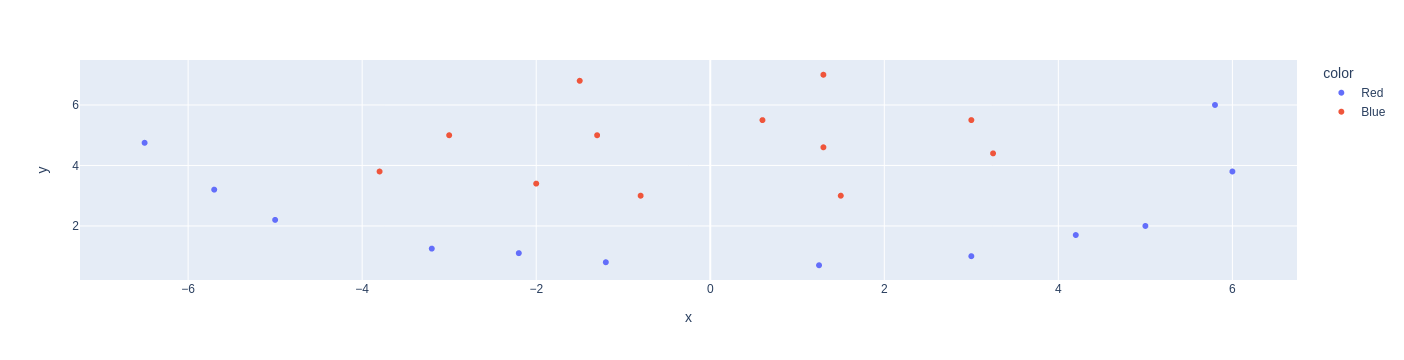

In [27]:
import plotly.express as px
fig = px.scatter(x=xy_datapoint['x'], y=xy_datapoint['y'], color = xy_datapoint['color'])
fig.show()

The longer the point is from $X=0$, the higher the $y$ value for the Blue dots. To flatten this out, I decided to divide absolute y values by the absolute x values, and smooth it with a log. I added 0.0001 to the x part, in case an x value is 0 or very very close to it.
$$ log (\frac{|y|}{|x|})$$   

The result is the following (using the x values)

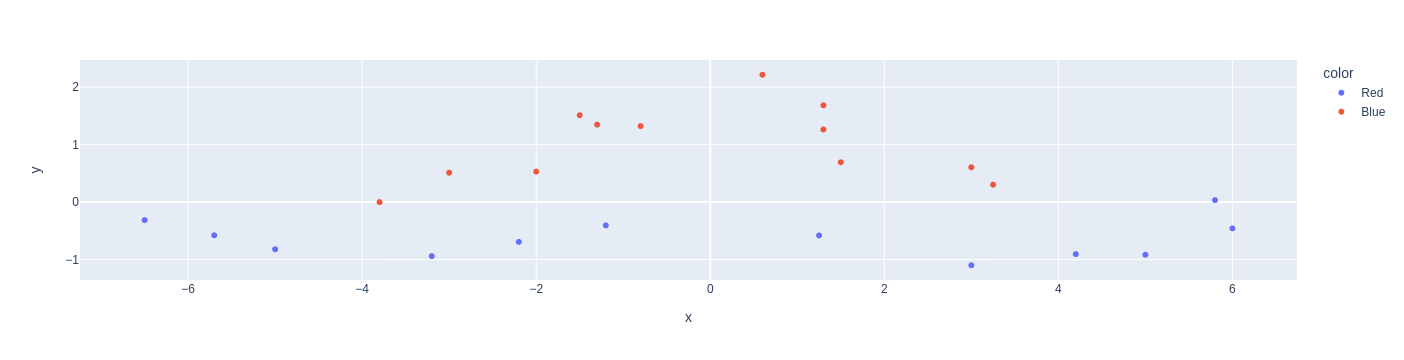

In [49]:
import plotly.express as px
fig = px.scatter(x=(xy_datapoint['x']), y=np.log(np.abs(xy_datapoint['y'])/np.abs(xy_datapoint['x']+0.0001)), color = xy_datapoint['color'])
fig.show()

Here's the 3d display

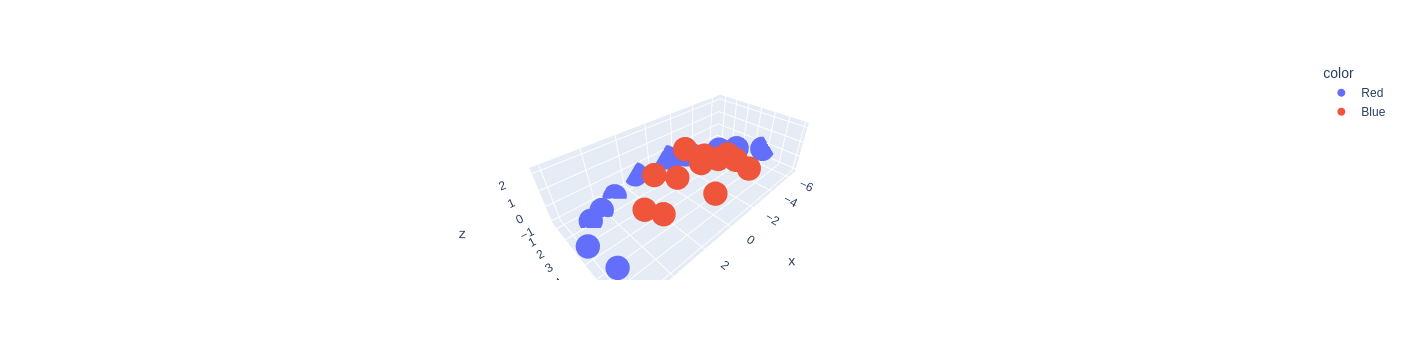

In [51]:
fig = px.scatter_3d(x=xy_datapoint['x'], y=xy_datapoint['y'], z=np.log(np.abs(xy_datapoint['y'])/np.abs(xy_datapoint['x']+0.0001)),
              color=xy_datapoint['color'])
fig.show()

In [52]:
## Add feature to dataframe
xy_datapoint['flat_xy'] = np.log(np.abs(xy_datapoint['y'])/np.abs(xy_datapoint['x']+0.0001))

Let us create a baseline model, without the additional feature first, and then compare it with the addition of the that feature.

In [130]:
X = xy_datapoint[[column for column in xy_datapoint.columns if column != 'color']]
y = xy_datapoint['color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [138]:
svc = svm.SVC(kernel='rbf').fit(X_train, y_train)

In [139]:
## Baseline Results

baseline_acc = accuracy_score(y_test, svc.predict(X_test))
baseline_pre = precision_score(y_test, svc.predict(X_test), average = 'weighted')
baseline_rec = recall_score(y_test, svc.predict(X_test), average = 'weighted')

print(f'Accuracy: {baseline_acc}\nPrecision: {baseline_pre}\nRecall: {baseline_rec}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [140]:
X_train[['x','y']]

,x,y
13,-3.00,5.00
1,-5.70,3.20
21,1.50,3.00
5,-1.20,0.80
2,-5.00,2.20
12,-3.80,3.80
15,-1.50,6.80
3,-3.20,1.25
4,-2.20,1.10
22,3.00,5.50


Let us use the GridSearch used in a previous exercise to obtain the best estimator.

In [143]:
from sklearn.model_selection import GridSearchCV

parameters = [{'kernel':('linear', 'rbf'), 'C':[0.7,0.9,1, 2.5, 5, 10]},{'kernel':['poly'], 'C':[0.7,0.9,1, 2.5, 5, 10], 'degree':[1,2,3]}]
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5).fit(X_train, y_train)

In [144]:
## GridSearch Results

acc = accuracy_score(y_test, clf.best_estimator_.predict(X_test))
pre = precision_score(y_test, clf.best_estimator_.predict(X_test), average = 'weighted')
rec = recall_score(y_test, clf.best_estimator_.predict(X_test), average = 'weighted')

print(f'Accuracy: {acc}\nPrecision: {pre}\nRecall: {rec}')

Accuracy: 0.8333333333333334
Precision: 0.8888888888888888
Recall: 0.8333333333333334
